In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../df_primera_limpieza.csv', index_col=0)

In [3]:
df[df['customer_type']=='Group']['children'].unique()

array([ 0., nan,  2., 14.,  1.,  3.])

In [4]:
df[(df['children']>10)&(df['customer_type']=='Transient')][['children', 'customer_type']]

,children,customer_type
8047,19.0,Transient
10267,17.0,Transient
11534,11.0,Transient
12812,18.0,Transient
12980,13.0,Transient
13467,17.0,Transient
13507,18.0,Transient
18310,11.0,Transient
27221,16.0,Transient
30801,14.0,Transient


In [5]:
df_isna = df[df['previous_cancellations'].isnull()]

df_isna

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,0
0,Resort Hotel,False,342.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,NaN,0.0,BB,PRT,NaN,Direct,0.0,NaN,0.0,C,C,3.0,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01 00:00:00,NaN
6,Resort Hotel,False,0.0,2015.0,July,NaN,1.0,0.0,2.0,2.0,NaN,0.0,BB,NaN,Direct,Direct,0.0,NaN,0.0,C,C,0.0,NaN,NaN,0.0,NaN,107.00,0.0,0.0,Check-Out,2015-07-03 00:00:00,NaN
7,Resort Hotel,False,9.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,0.0,0.0,FB,NaN,Direct,Direct,0.0,NaN,0.0,C,C,0.0,303.0,NaN,0.0,NaN,103.00,0.0,1.0,Check-Out,2015-07-03 00:00:00,NaN
8,Resort Hotel,True,85.0,2015.0,July,27.0,1.0,0.0,3.0,2.0,0.0,0.0,BB,PRT,NaN,NaN,0.0,NaN,0.0,A,A,0.0,240.0,NaN,0.0,Transient,82.00,0.0,1.0,Canceled,2015-05-06 00:00:00,NaN
14,Resort Hotel,False,37.0,2015.0,July,27.0,1.0,0.0,4.0,2.0,NaN,0.0,BB,NaN,Online TA,TA/TO,0.0,NaN,0.0,E,E,0.0,241.0,NaN,0.0,Transient,94.71,0.0,0.0,Check-Out,2015-07-05 00:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119374,City Hotel,False,201.0,2017.0,August,35.0,29.0,1.0,5.0,2.0,NaN,0.0,BB,DEU,NaN,TA/TO,0.0,NaN,0.0,A,A,0.0,9.0,NaN,0.0,Transient,117.00,0.0,2.0,Check-Out,2017-04-09 00:00:00,NaN
119377,City Hotel,False,185.0,2017.0,August,35.0,30.0,1.0,4.0,2.0,0.0,0.0,SC,CHE,NaN,TA/TO,0.0,NaN,0.0,A,A,0.0,9.0,NaN,0.0,Transient,99.00,0.0,1.0,Check-Out,NaN,NaN
119383,City Hotel,False,164.0,2017.0,August,35.0,31.0,2.0,4.0,2.0,0.0,0.0,BB,DEU,NaN,TA/TO,0.0,NaN,0.0,NaN,A,0.0,42.0,NaN,0.0,Transient,87.60,0.0,0.0,Check-Out,NaN,NaN
119384,City Hotel,False,21.0,NaN,August,NaN,30.0,2.0,5.0,2.0,0.0,0.0,BB,BEL,NaN,TA/TO,0.0,NaN,0.0,A,A,0.0,394.0,NaN,0.0,Transient,96.14,0.0,2.0,Check-Out,2017-06-09 00:00:00,NaN


In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', '0'],
      dtype='object')

In [7]:
df['arrival_date_year'].unique()

array([2015.,   nan, 2016., 2017.])

In [8]:
df1 = df.iloc[:, 9:16]
df1.dtypes

adults                  float64
children                float64
babies                  float64
meal                     object
country                  object
market_segment           object
distribution_channel     object
dtype: object

In [9]:
df['assigned_room_type'].value_counts()

A    72716
D    25280
E     7803
F     3750
G     2553
C     2374
B     2162
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

In [10]:
df['distribution_channel'].value_counts()

TA/TO        85534
Direct       12960
Corporate     5864
GDS            176
Undefined        5
Name: distribution_channel, dtype: int64

In [11]:

df['assigned_room_type'].mode()

0    A
dtype: object

In [12]:
df1.isnull().sum()/df1.shape[0]*100

adults                   0.000000
children                42.052455
babies                   0.000000
meal                     0.000000
country                 45.552307
market_segment          49.798737
distribution_channel    11.411381
dtype: float64

In [13]:
df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [14]:
df[df['children'] >0]['assigned_room_type'].unique()

array(['G', 'C', 'D', 'H', 'F', 'A', 'E', 'I', 'B', 'K'], dtype=object)

In [15]:
df[df['children'] == 0]['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'I', 'B', 'F', 'H', 'P', 'K'],
      dtype=object)

In [16]:
df['agent'].isnull().sum()/df.shape[0]*100

13.6858607686115

In [17]:
df['children'].unique()

array([nan,  0.,  1.,  2., 10., 19.,  3., 17., 11., 18., 13., 16., 14.,
       15., 12.])

In [18]:
df['children'].dropna().agg(['mean', 'median'])

mean      0.119887
median    0.000000
Name: children, dtype: float64

- **Sin niños** no suelen reservar L, P ('room_type')
- Hay más agentes que distribution_channel nulos

In [19]:
df = pd.read_csv('../df_primera_limpieza.csv', index_col=0)

In [20]:
df_filtrado.isnull().sum()/df_filtrado.shape[0]*100

NameError: name 'df_filtrado' is not defined

In [ ]:
df_filtrado['customer_type'].value_counts()

In [ ]:
porcentaje_aparicion = df_filtrado['customer_type'].value_counts(normalize=True)

# Valores para imputar
valor1 = 'Transient'
valor2 = 'Transient-Party'

# Porcentajes de aparición de los valores
porcentaje_valor1 = porcentaje_aparicion.get(valor1, 0)
porcentaje_valor2 = porcentaje_aparicion.get(valor2, 0)

# Imputar valores nulos basados en los porcentajes
for i, valor in enumerate(df_filtrado['customer_type']):
    if pd.isnull(valor):
        # Generar un número aleatorio entre 0 y 1
        rand = np.random.rand()
        if rand < porcentaje_valor1:
            df_filtrado.loc[i, 'customer_type'] = valor1
        else:
            df_filtrado.loc[i, 'customer_type'] = valor2

display(df_filtrado)

In [ ]:
df_filtrado['customer_type'].isnull().sum()/df_filtrado.shape[0]*100

In [ ]:
df_filtrado['customer_type'].value_counts()

## COMPROBACIONES
LAURA:
- lead_time y booking_changes 
- lead_time y reservation_status
- lead_time, booking_changes  y reservation_status
>----------------
FEDRA:
- lead_time y is_cancelled 
- customer_type y is_cancelled
- assigned_room_type y is_cancelled
>----------------
NEREA:
- is_repeated_guest y is_cancelled
- is_repeated_guest y previous_cancellations, previous_bookings_not_canceled
- country y is_cancelled
>----------------
ISA:
- cuándo hay más llegadas (mes)
- cuándo se hacen más reservas (reservation_status_date)
- promedio de noches por tipo de cliente
- mapa con países que más bookean



### hilos graciosos:
- por qué repiten (is_repeated_guest y meal, etc)

## VISUALIZACIONES

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
pd.set_option('display.max_columns', None) 

In [22]:
df = pd.read_csv('../df_primera_limpieza.csv', index_col=0)

In [23]:
def periodo_tiempo(valor):
    if valor >= 40:
        return '40-50'
    elif valor >= 30:
        return '30-40'
    elif valor >= 20:
        return '20-30'
    elif valor >= 10:
        return '10-20'
    else:
        return '0-10'


In [24]:
df['period_stays_week'] = df['stays_in_week_nights'].apply(periodo_tiempo)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

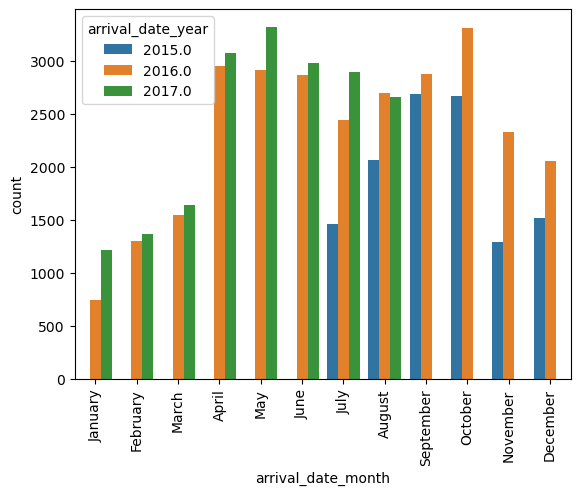

In [25]:
sns.countplot(x='arrival_date_month', data=df, hue='arrival_date_year', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '12.0'),
  Text(12, 0, '13.0'),
  Text(13, 0, '14.0'),
  Text(14, 0, '16.0'),
  Text(15, 0, '18.0'),
  Text(16, 0, '19.0')])

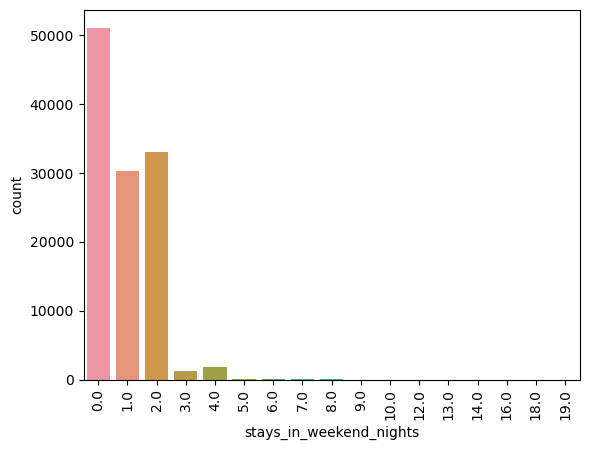

In [26]:
sns.countplot(x='stays_in_weekend_nights', data=df)
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='stays_in_week_nights', ylabel='count'>

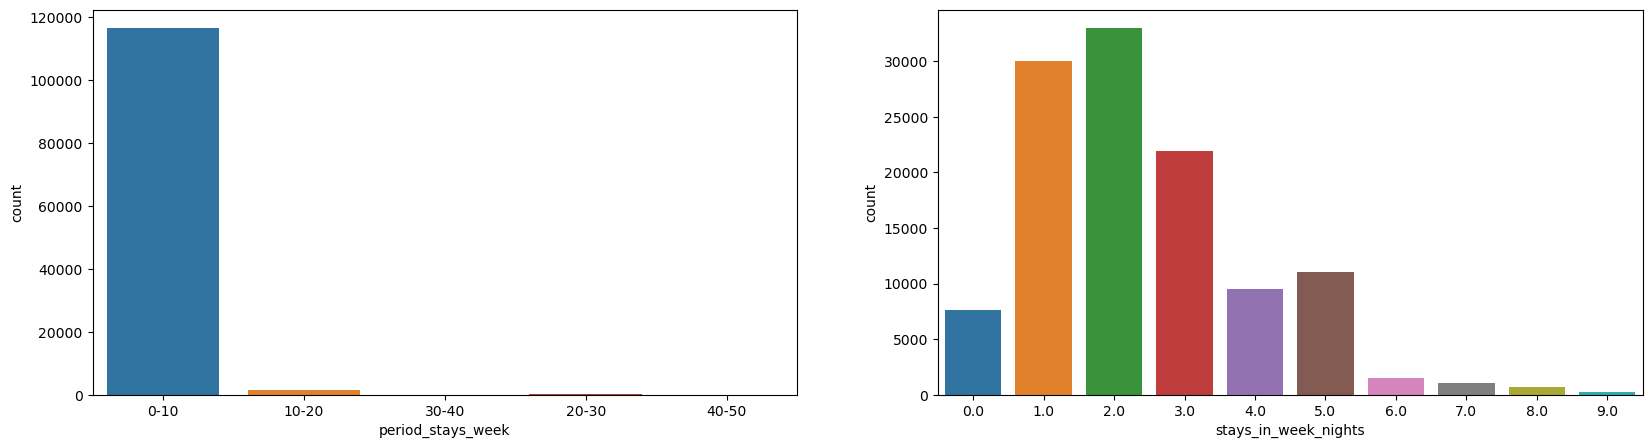

In [27]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.countplot(x='period_stays_week', data=df, ax=axes[0])
sns.countplot(x=df[df['period_stays_week']=='0-10']['stays_in_week_nights'], data=df, ax=axes[1])


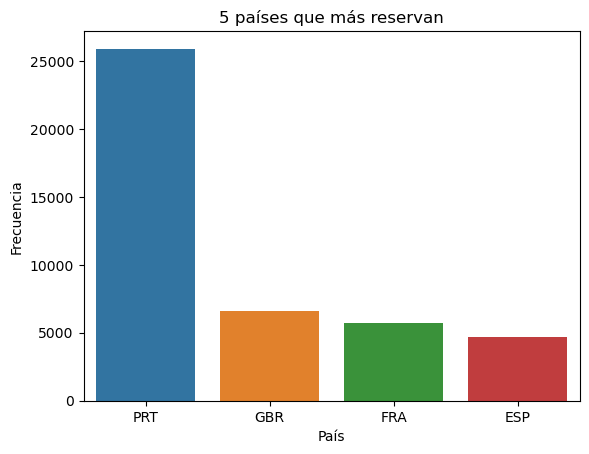

In [28]:
from collections import Counter

# Datos de ejemplo
datos = df['country']

# Contar las ocurrencias de cada elemento
contador = Counter(datos)

# Obtener los cinco elementos más comunes
elementos_comunes = contador.most_common(5)

# Crear un DataFrame de Seaborn
data = {'Elemento': [item[0] for item in elementos_comunes],
        'Frecuencia': [item[1] for item in elementos_comunes]}
df2 = pd.DataFrame(data)

# Crear el gráfico utilizando Seaborn
sns.barplot(x='Elemento', y='Frecuencia', data=df2)
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.title('5 países que más reservan')
plt.show()

<AxesSubplot:xlabel='country', ylabel='count'>

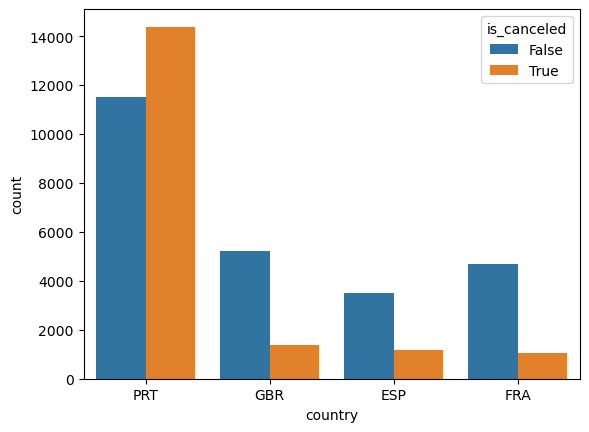

In [29]:
top5 = df[df['country'].isin(['PRT', 'GBR', 'FRA', 'ESP'])]
sns.countplot(x='country', hue='is_canceled', data=top5)

In [30]:
df['lead_time'].agg(['min', 'max'])

min      0.0
max    737.0
Name: lead_time, dtype: float64

In [4]:
def lead_time(valor):
    if valor > 365:
        return '> 12 meses'
    elif valor > 330:
        return '> 11 meses'
    elif valor > 300:
        return '> 10 meses'
    elif valor > 270:
        return '> 9 meses'
    elif valor > 240:
        return '> 8 meses'
    elif valor > 210:
        return '> 7 meses'
    elif valor > 180:
        return '> 6 meses'
    elif valor > 150:
        return '> 5 meses'
    elif valor > 120:
        return '> 4 meses'
    elif valor > 90:
        return '> 3 meses'
    elif valor > 60:
        return '> 2 meses'
    elif valor > 30:
        return '> 1 mes'
    else:
        return '< 1 mes'


In [5]:
df['lead_time_months'] = df['lead_time'].apply(lead_time)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '> 1 año'),
  Text(1, 0, '> 11 meses'),
  Text(2, 0, '> 10 meses'),
  Text(3, 0, '> 9 meses'),
  Text(4, 0, '> 8 meses'),
  Text(5, 0, '> 7 meses'),
  Text(6, 0, '> 6 meses'),
  Text(7, 0, '> 5 meses'),
  Text(8, 0, '> 4 meses'),
  Text(9, 0, '> 3 meses'),
  Text(10, 0, '> 2 meses'),
  Text(11, 0, '> 1 mes'),
  Text(12, 0, '< 1 mes')])

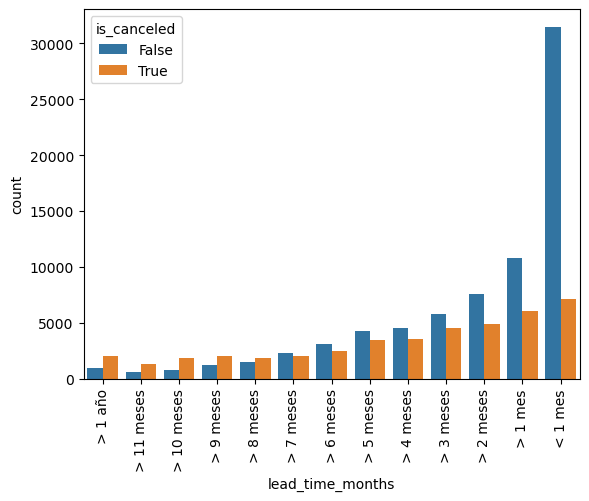

In [33]:
sns.countplot(x='lead_time_months', 
hue='is_canceled', 
data=df, 
order = [
    '> 1 año',
    '> 11 meses',
    '> 10 meses',
    '> 9 meses',
    '> 8 meses',
    '> 7 meses',
    '> 6 meses',
    '> 5 meses',
    '> 4 meses',
    '> 3 meses',
    '> 2 meses',
    '> 1 mes',
    '< 1 mes'
])
plt.xticks(rotation = 90)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../files/df_final.csv', index_col=0)

C:\Users\Isabel\AppData\Local\Temp\ipykernel_7820\3010077580.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\Isabel\AppData\Local\Temp\ipykernel_7820\3010077580.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../files/df_final.csv', index_col=0)


In [2]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'average_daily_rate',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '> 1 año'),
  Text(1, 0, '> 11 meses'),
  Text(2, 0, '> 10 meses'),
  Text(3, 0, '> 9 meses'),
  Text(4, 0, '> 8 meses'),
  Text(5, 0, '> 7 meses'),
  Text(6, 0, '> 6 meses'),
  Text(7, 0, '> 5 meses'),
  Text(8, 0, '> 4 meses'),
  Text(9, 0, '> 3 meses'),
  Text(10, 0, '> 2 meses'),
  Text(11, 0, '> 1 mes'),
  Text(12, 0, '< 1 mes')])

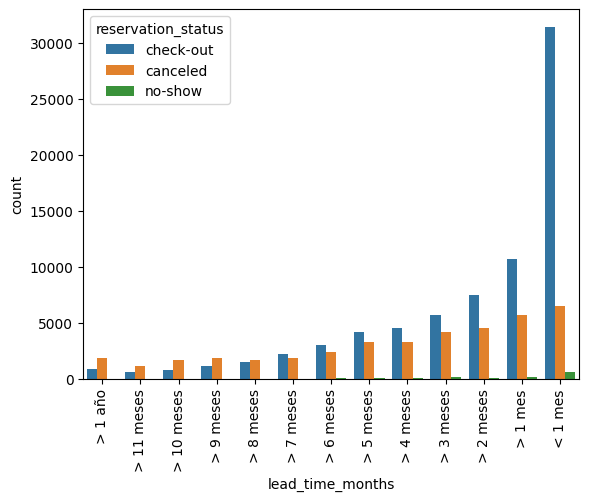

In [6]:
sns.countplot(x='lead_time_months', 
hue='reservation_status', 
data=df, 
order = [
    '> 1 año',
    '> 11 meses',
    '> 10 meses',
    '> 9 meses',
    '> 8 meses',
    '> 7 meses',
    '> 6 meses',
    '> 5 meses',
    '> 4 meses',
    '> 3 meses',
    '> 2 meses',
    '> 1 mes',
    '< 1 mes'
])
plt.xticks(rotation = 90)

In [34]:
from scipy.stats import pearsonr


# Calcular la correlación de Pearson
correlacion, valor_p = pearsonr(df['lead_time'], (df['is_canceled']))

print("Coeficiente de correlación de Pearson:", correlacion)
print("Valor p:", valor_p)


Coeficiente de correlación de Pearson: 0.2900300052578754
Valor p: 0.0


## OBSERVACIONES:

**lead_time y is_canceled**
- parece haber una correlación moderada 
- vemos que con más de 8 meses de antelación es más probable que cancelen (en 7 meses ya se acercan el número de True y False)

**arrival_date_month por año**
- 2015: septiembre y octubre
- 2016: octubre con diferencia, seguido de abril
- 2017: mayo

**stays_in_weekends_nights**:
- cómo se van a quedar más de 2?
- la gente se queda sobre todo entre semana
- si se alojan, es el finde entero (2 noches)

**week_nights**:
- suelen quedarse de 0-10 sobre todo; lo que más, 1 o 2 noches

**países desde donde se reservan más**:
- Portugal con diferencia
- Seguido de Gran Bretaña, Francia y España

**country y is_cancelled**:
- En Portugal cancelan más reservas de las que salen adelante






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df =pd.read_csv('../df_definitivo.csv')

C:\Users\Isabel\AppData\Local\Temp\ipykernel_7296\4164747749.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'average daily rate',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'lead_time_months'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '> 12 meses'),
  Text(1, 0, '> 11 meses'),
  Text(2, 0, '> 10 meses'),
  Text(3, 0, '> 9 meses'),
  Text(4, 0, '> 8 meses'),
  Text(5, 0, '> 7 meses'),
  Text(6, 0, '> 6 meses'),
  Text(7, 0, '> 5 meses'),
  Text(8, 0, '> 4 meses'),
  Text(9, 0, '> 3 meses'),
  Text(10, 0, '> 2 meses'),
  Text(11, 0, '> 1 mes'),
  Text(12, 0, '< 1 mes')])

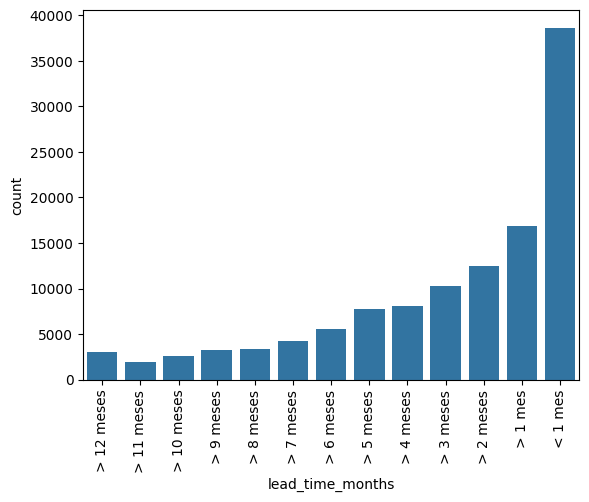

In [6]:
sns.countplot(x='lead_time_months', data=df, order=[
    '> 12 meses',
    '> 11 meses',
    '> 10 meses',
    '> 9 meses',
    '> 8 meses',
    '> 7 meses',
    '> 6 meses',
    '> 5 meses',
    '> 4 meses',
    '> 3 meses',
    '> 2 meses',
    '> 1 mes',
    '< 1 mes'
])

plt.xticks(rotation = 90)